In [140]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Import Modules

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the dataset

In [144]:
# Load the dataset
train = pd.read_csv('/kaggle/input/titanic/train.csv')  # Adjust path if necessary
data = pd.read_csv('/kaggle/input/titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [146]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [148]:
## Statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [150]:
## data type info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [151]:
train.shape

(891, 12)

**Exploratory Data Analysis**
let us begin by checking the missing data!

In [152]:
## MISSING VALUE
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [153]:
## Drop the Cabin Column
train.drop(["Cabin"],axis=1,inplace=True)
## Fill the missing value of Age by the Median value
train["Age"].fillna(train["Age"].median())
## Fill the missing value of Embarked by the Mod value
train["Embarked"].fillna(train["Embarked"].mode())

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [154]:
train.shape

(891, 11)

In [156]:
##Count the value of Survivals
train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [157]:
##Count total number of Passengers class
train["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [158]:
## Count the number of passangers based on their Gender
train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [159]:
## Count the number of Siblings/Spouse
train["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [160]:
## Count the number of Embarked
train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

**Countdown visualization of the object Data Type Columns**

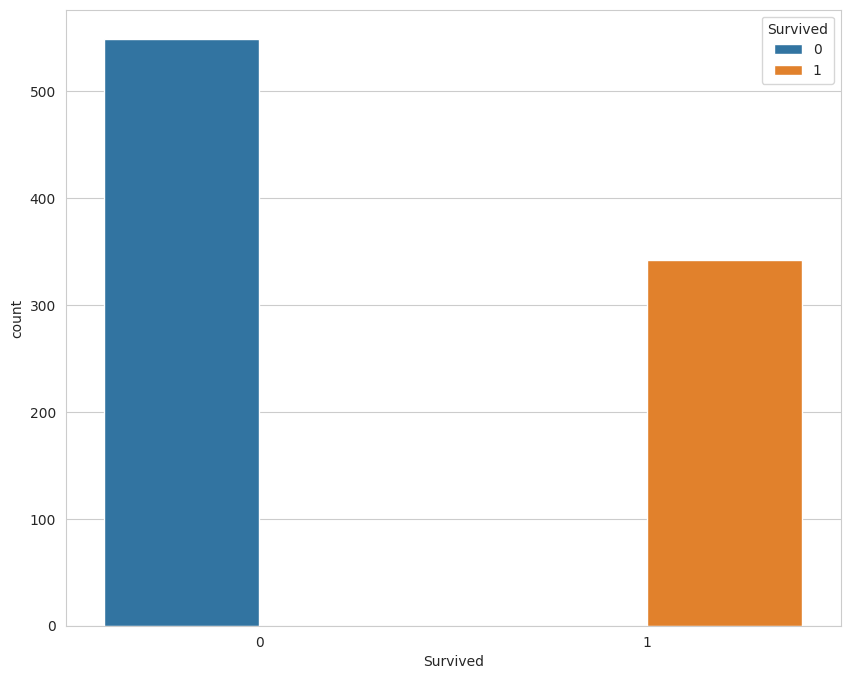

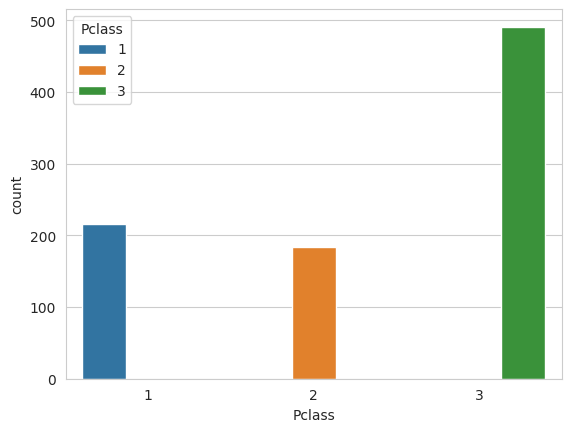

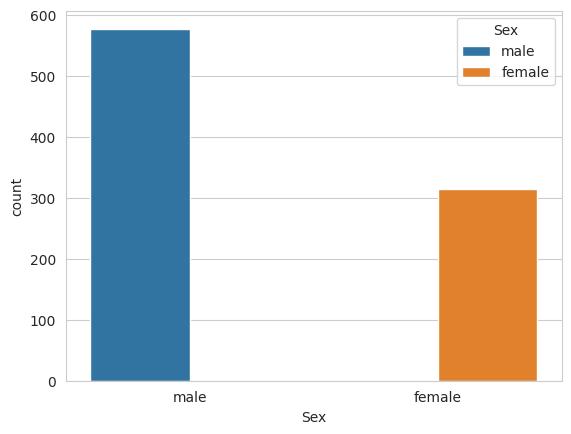

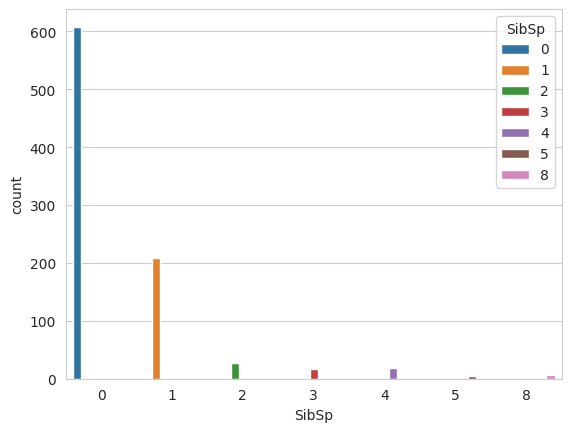

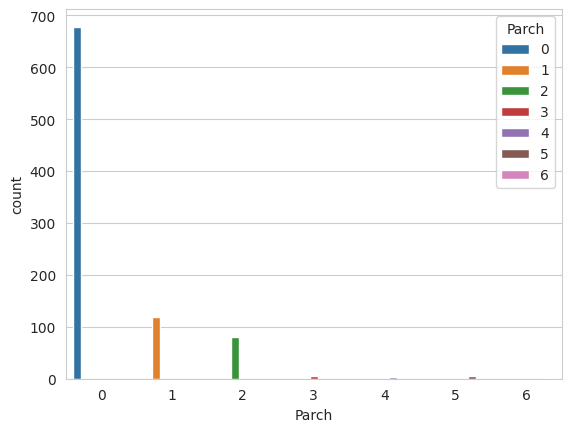

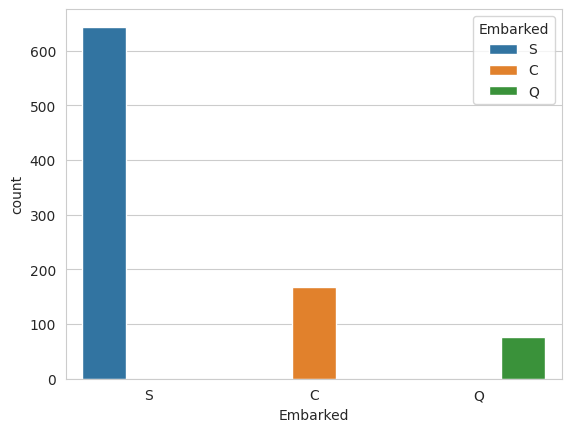

In [161]:
plt.figure(figsize=(10,8))
for col in ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]:
    sns.countplot(train, x=col, hue=col)
    plt.xticks()
    plt.show()

## Distribution of the dataset

In [162]:
def distplots(col):
    sns.distplot(train[col])
    plt.show()

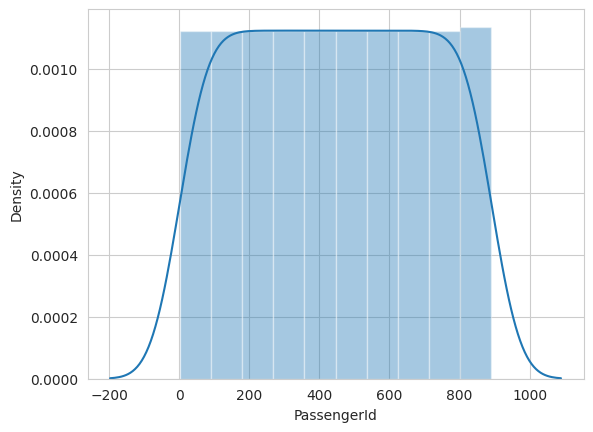

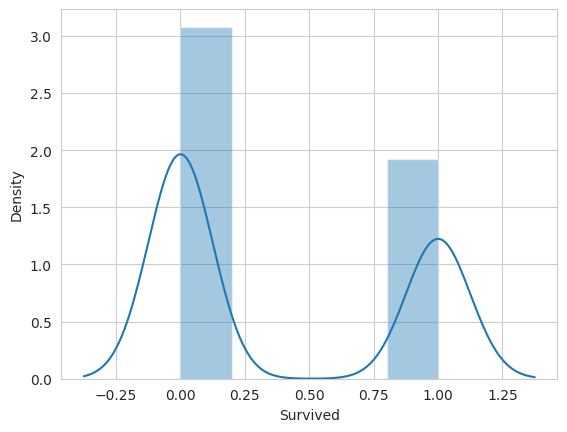

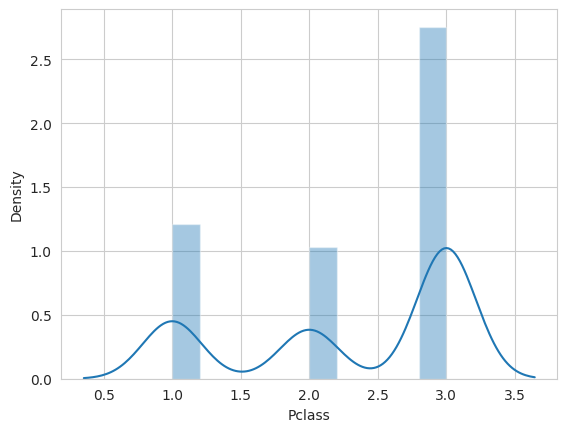

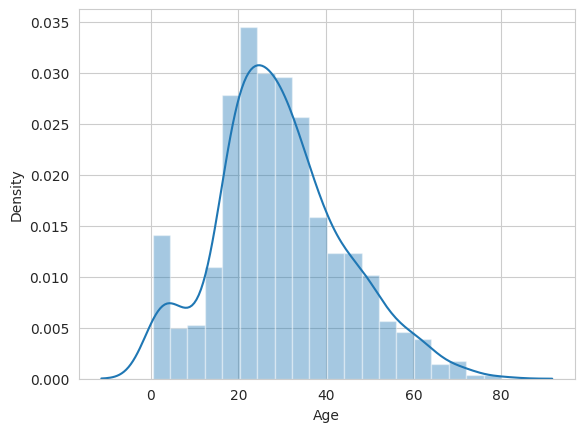

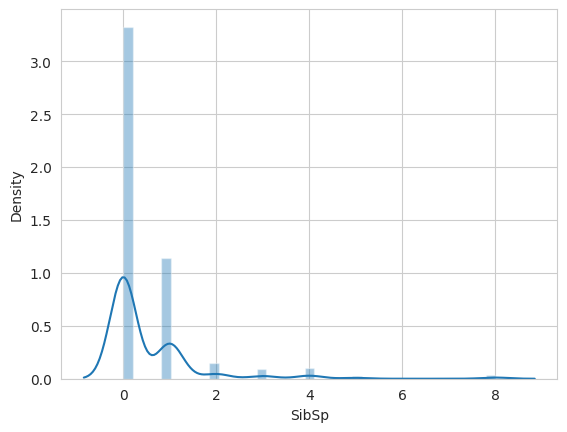

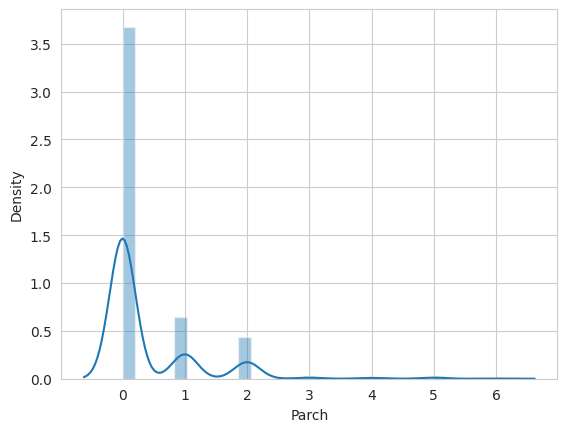

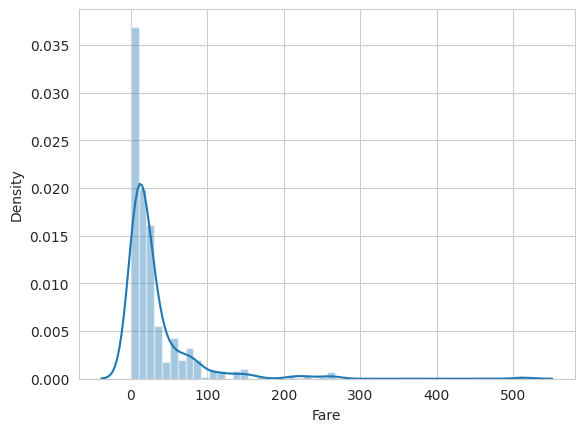

In [163]:
for i in list(train.select_dtypes(exclude=["object"]).columns):
    distplots(i)

Histplot Visualization of the dataset

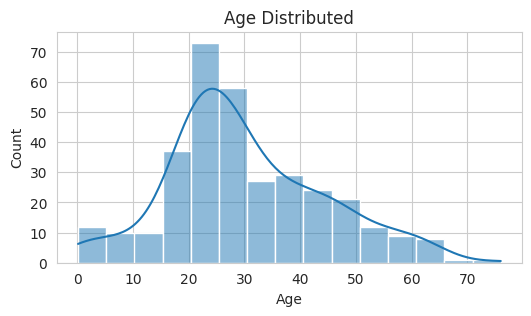

In [164]:
plt.figure(figsize=(6,3))
sns.histplot(data["Age"],kde=True)
plt.title("Age Distributed")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

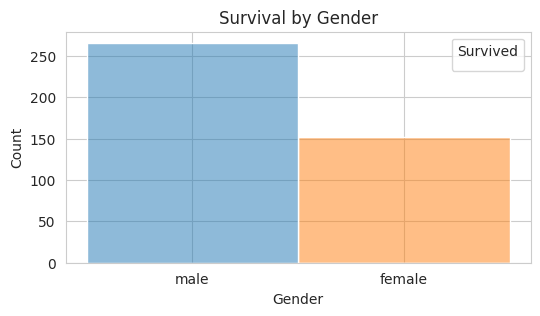

In [165]:
plt.figure(figsize=(6,3))
sns.histplot(data=data,x="Sex",hue="Sex")
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", loc="upper right")
plt.show()

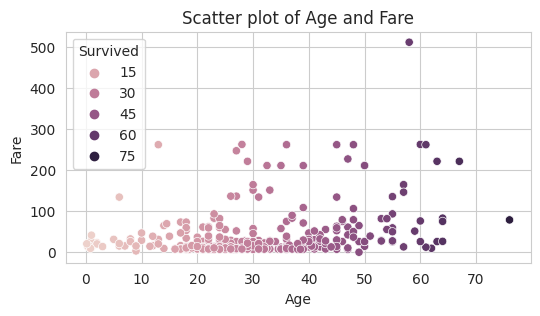

In [166]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=data,x="Age",y="Fare", hue="Age")
plt.title("Scatter plot of Age and Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

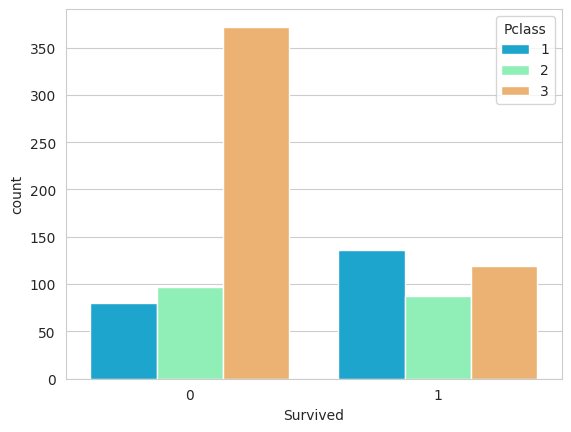

In [167]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

<Axes: ylabel='count'>

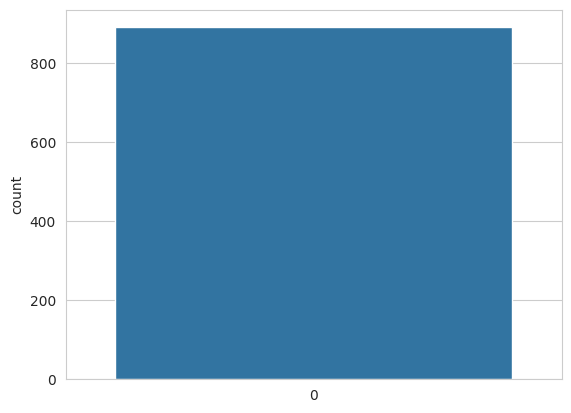

In [168]:
sns.countplot(train["SibSp"])

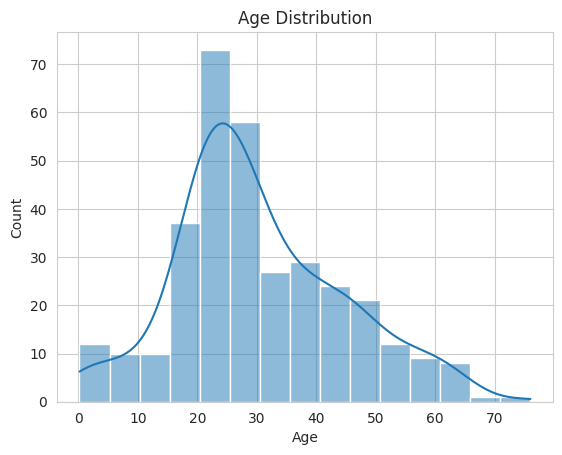

ValueError: Could not interpret value `Survived` for parameter `hue`

In [169]:
# Age distribution
sns.histplot(data=data, x='Age', kde=True)
plt.title("Age Distribution")
plt.show()

# Age distribution by survival
sns.histplot(data=data, x='Age', hue='Survived', kde=True, element="step", stat="density")
plt.title("Age Distribution by Survival")
plt.show()

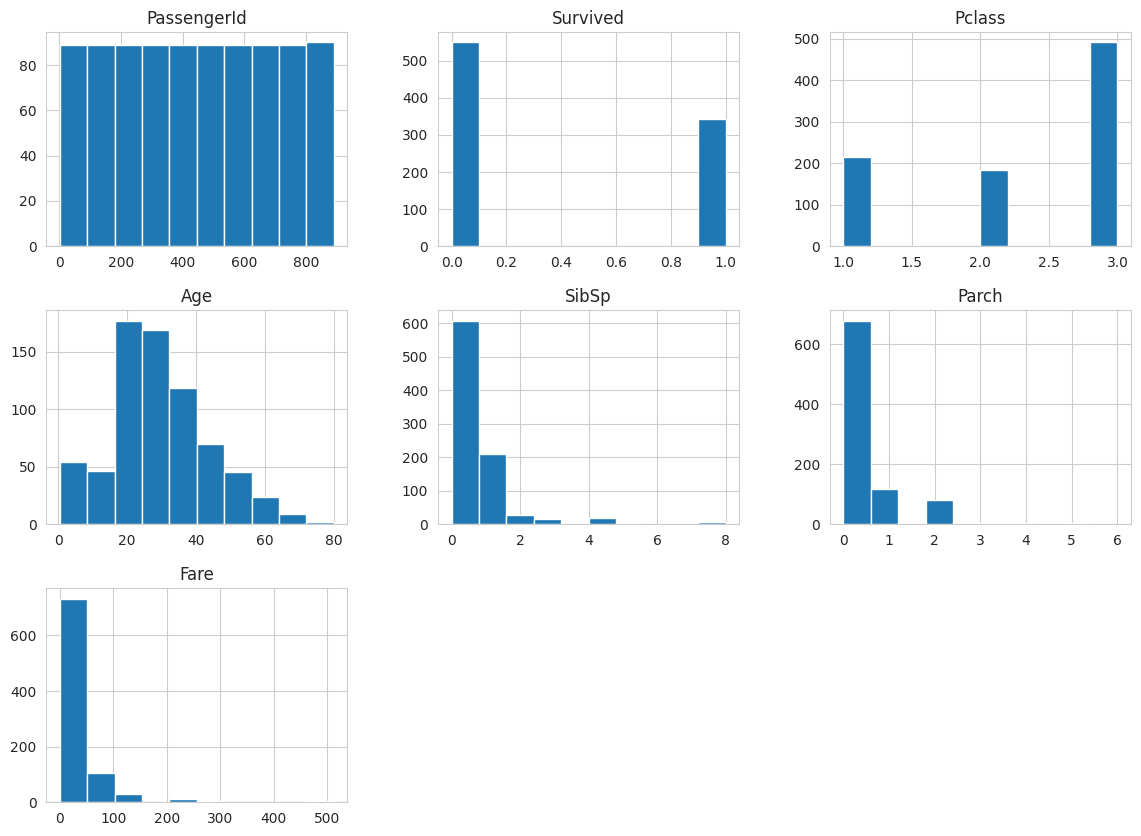

In [170]:
train.hist(bins=10, figsize=(14,10))
plt.show()

<Axes: >

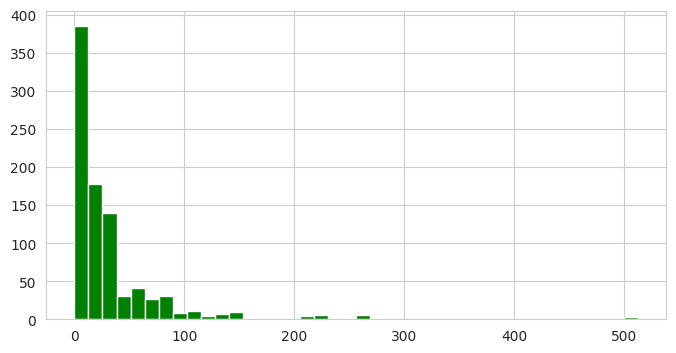

In [171]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

Analysis and Visualization of the data

In [172]:
train.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

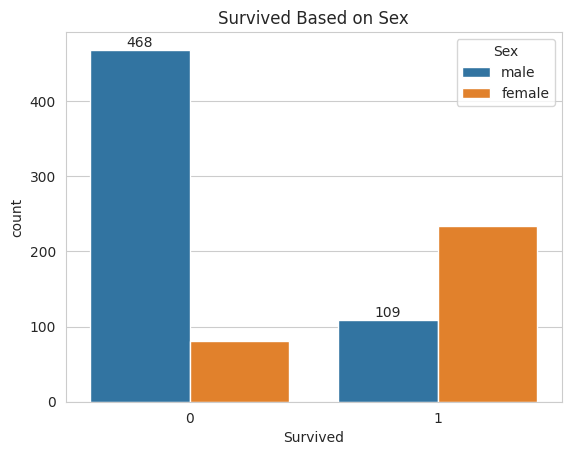

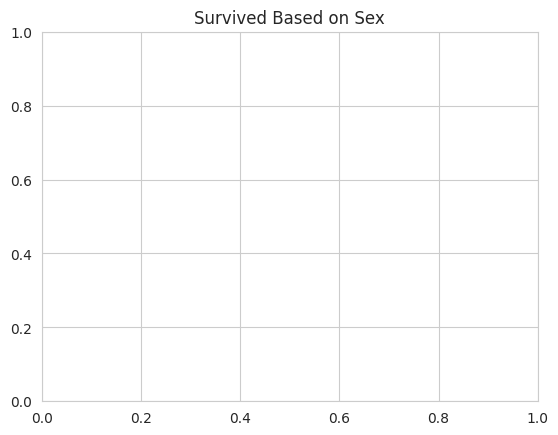

In [173]:
ax=sns.countplot(train, x="Survived", hue="Sex")
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title("Survived Based on Sex")
    plt.show()

In [174]:
train.groupby("Sex")["Pclass"].value_counts()

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: count, dtype: int64

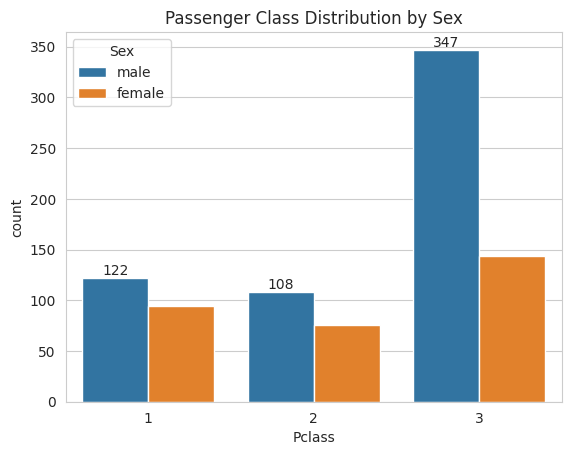

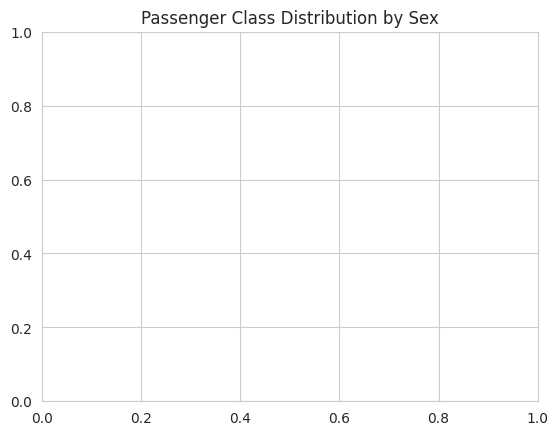

In [175]:
ax = sns.countplot(data=train, x='Pclass', hue='Sex')
for container in ax.containers:
    ax.bar_label(container)
    plt.title('Passenger Class Distribution by Sex')
    plt.show()

In [176]:
train.groupby(["Sex", "SibSp"]).size()

Sex     SibSp
female  0        174
        1        106
        2         13
        3         11
        4          6
        5          1
        8          3
male    0        434
        1        103
        2         15
        3          5
        4         12
        5          4
        8          4
dtype: int64

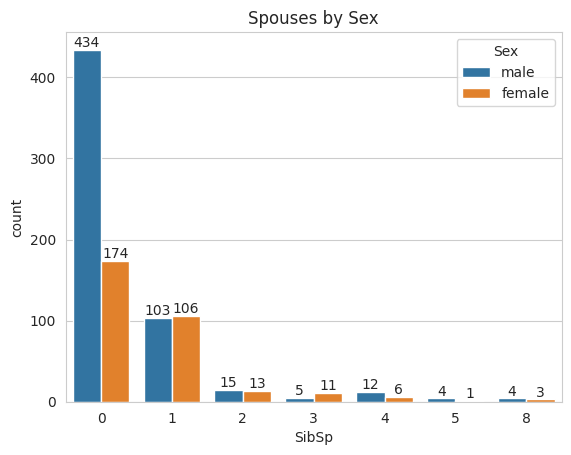

In [177]:
ax = sns.countplot(data=train, x="SibSp", hue="Sex")
for container in ax.containers:
    ax.bar_label(container)
ax.set_title("Spouses by Sex")
plt.show()

In [178]:
train.groupby(["Sex", "Embarked"]).size()

Sex     Embarked
female  C            73
        Q            36
        S           203
male    C            95
        Q            41
        S           441
dtype: int64

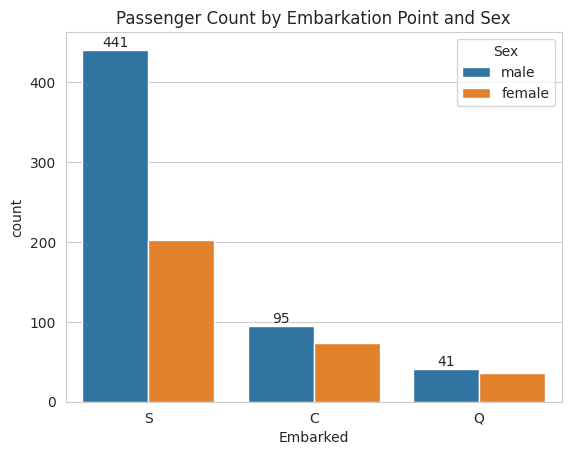

In [179]:
ax = sns.countplot(data=train, x="Embarked", hue="Sex")
for container in ax.containers:
    ax.bar_label(container)
    ax.set_title("Passenger Count by Embarkation Point and Sex")
    plt.show()

In [180]:
## Minimum age of the passengers
np.min(train["Age"])

0.42

In [181]:
## Maximum age of the passengers
np.max(train["Age"])

80.0

In [182]:
## Average age of the passengers
train["Age"].median()

28.0

In [183]:
## Minimum Fare Paid by the passengers
np.min(train["Fare"])

0.0

In [184]:
## Maximum Fare Paid by the passengers
np.max(train["Fare"])

512.3292

In [185]:
## Average Fare Paid by the passengers
train["Fare"].median()

14.4542

**Feature Engineering**
To extract more insights, let’s create a few new features:

In [188]:
## Create a new feature "Family_Sizea"
train["Family_Size"] = train["SibSp"] + train["Parch"]

In [ ]:
## Create 'Is_Alone' feature
train["Is_Alone"] = (train["Family_Size"] == 0).astype(int)

**Data Cleaning**

<Axes: xlabel='Pclass', ylabel='Age'>

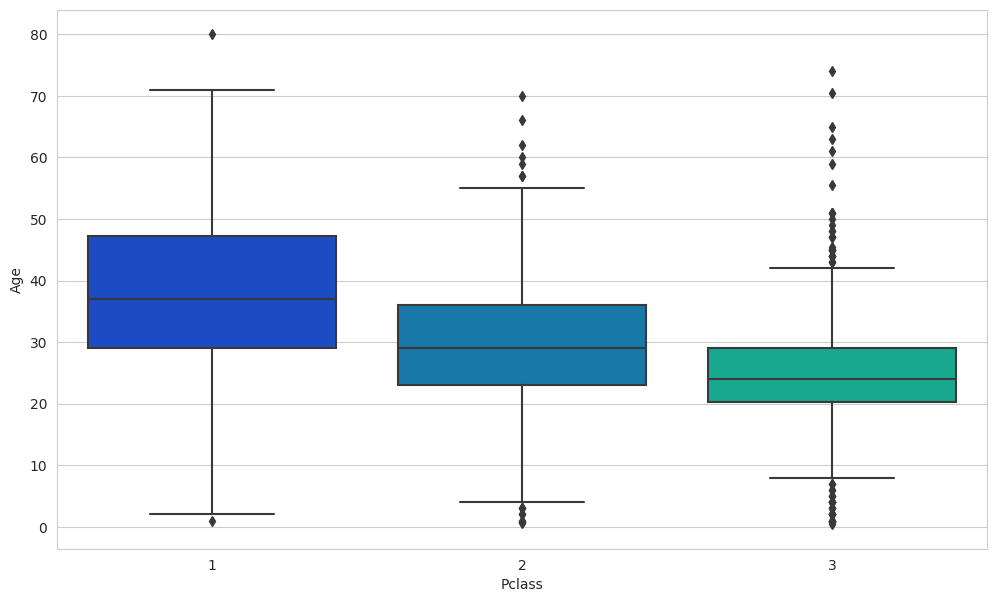

In [201]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [202]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
         return Age

In [196]:
train['Age'] = train[['Age','Pclass']].apply(input_age,axis=1)

<Axes: >

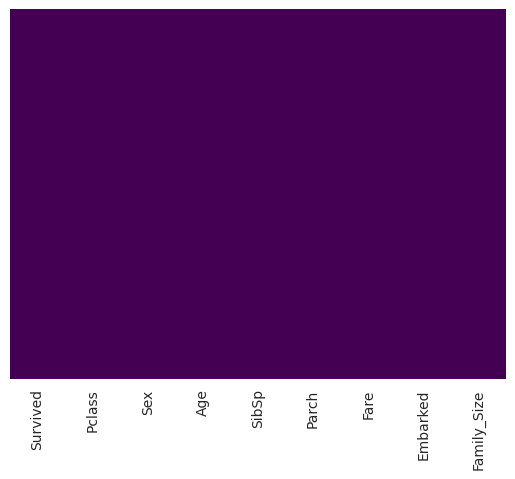

In [206]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [203]:
train.drop('Cabin',axis=1,inplace=True,  errors='ignore')

In [204]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [205]:
train.dropna(inplace=True)

Converting Categorical Features

In [207]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     889 non-null    int64  
 1   Pclass       889 non-null    int64  
 2   Sex          889 non-null    object 
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Embarked     889 non-null    object 
 8   Family_Size  889 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [208]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [209]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [215]:
# Safely drop columns if they exist
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True, errors='ignore')

In [216]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,1
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,1
4,0,3,35.0,0,0,8.0500,0


In [218]:
train = pd.concat([train,sex,embark],axis=1)

In [219]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1,True,False,True,True,False,True
1,1,1,38.0,1,0,71.2833,1,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,0,False,False,True,False,False,True
3,1,1,35.0,1,0,53.1000,1,False,False,True,False,False,True
4,0,3,35.0,0,0,8.0500,0,True,False,True,True,False,True


**Train Test split**

In [220]:
train.drop('Survived',axis=1).head()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,male,Q,S,male,Q,S
0,3,22.0,1,0,7.2500,1,True,False,True,True,False,True
1,1,38.0,1,0,71.2833,1,False,False,False,False,False,False
2,3,26.0,0,0,7.9250,0,False,False,True,False,False,True
3,1,35.0,1,0,53.1000,1,False,False,True,False,False,True
4,3,35.0,0,0,8.0500,0,True,False,True,True,False,True


In [221]:
train['Survived'].head

<bound method NDFrame.head of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64>

In [222]:
from sklearn.model_selection import train_test_split

In [223]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'],test_size=0.30,random_state=101)

In [224]:
from sklearn.linear_model import LogisticRegression

In [225]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [226]:
predictions = logmodel.predict(x_test)

In [227]:
from sklearn.metrics import confusion_matrix

In [228]:
accuracy = confusion_matrix(y_test,predictions)

In [229]:
accuracy

array([[149,  14],
       [ 33,  71]])

In [230]:
from sklearn.metrics import accuracy_score

In [231]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8239700374531835

In [232]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])